<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [19]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [20]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [21]:
# dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
# dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

In [22]:
# get file names
riverDirectory = 'pics/2750/River'
edgeFiles = list()
 
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)
    edgeFiles.append(imgFile)
    
    
highwayDirectory = 'pics/2750/Highway'

 
for filename in os.listdir(highwayDirectory):
    imgFile = os.path.join(highwayDirectory, filename)
    edgeFiles.append(imgFile)
# txtFiles = list()

# for txtFile in dataFile.namelist():
#     txtFiles.append(txtFile)
#     # print(txtFile)

edgeFiles = [img for img in edgeFiles if ".jpg" in img]

print(edgeFiles[0])

imageObjects = np.zeros([len(edgeFiles), 64, 64, 3])
# print(imageObjects)

i = 0

for pic in edgeFiles:
    imageObjects[i] = np.asarray(Image.open(pic)).astype('uint8')/255
    i += 1
    
# print(imageObjects[0])    

pics/2750/River\River_1.jpg


<h3>Data filteren</h3>

In [23]:
edgeFiles = [x for x in edgeFiles if ".jpg" in x]

<h3>Data inlezen</h3>

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [24]:
# imageLabels = np.empty(len(txtFiles), dtype = 'S20')

# i = 0

# for label in txtFiles:
#     txtFiles[i] = label.split('/')[1]
#     i += 1
    
# print(txtFiles[1])    



imageLabels = np.empty(len(edgeFiles), dtype = 'S20')

i = 0

for label in edgeFiles:
    edgeFiles[i] = label.replace("\\","/").split('/')[2]
    i += 1

    

labelNames, labelNumbers = np.unique(edgeFiles, return_inverse=True)
# print(labelNames)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)

#print("labelNumbers", labelNumbers)
#print("LabelNumbers Length", len(labelNumbers))


#print("imageObjects", len(imageObjects))

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 2500],
       [   1, 2500]], dtype=int64)

In [25]:
# change them to integers in alphabetical order
# labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
# labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)
# print(labelNumbers)

# np.array(np.unique(labelNumbers, return_counts=True)).T

<h3>Data splitten</h3>

In [26]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.5, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)

print (len(trainSet), len(testSet),len(trainLabels), len(testLabels))

(2500, 64, 64, 3)
2500 2500 2500 2500


<h3>Data inspecteren</h3>

In [27]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

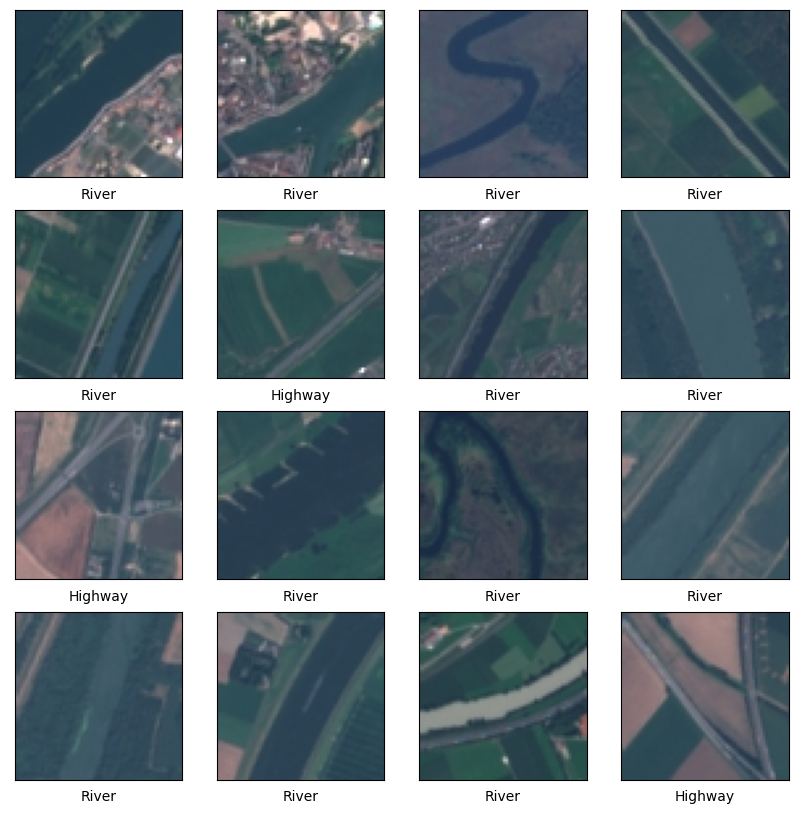

In [28]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [29]:
model =  keras.models.Sequential()
model.add(layers.Flatten(input_shape=(64, 64, 3)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.build()
model.summary()







Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                786496    
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)               

<h3>Definieer de trainparameters</h3>

In [30]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 30

<h3>Train het model</h3>

In [31]:
print(len(imageObjects))
print(len(trainLabels))
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


5000
2500
Epoch 1/30
40/40 - 1s - loss: 0.8562 - accuracy: 0.5120 - 732ms/epoch - 18ms/step
Epoch 2/30
40/40 - 0s - loss: 0.6392 - accuracy: 0.6288 - 305ms/epoch - 8ms/step
Epoch 3/30
40/40 - 0s - loss: 0.6484 - accuracy: 0.6372 - 332ms/epoch - 8ms/step
Epoch 4/30
40/40 - 0s - loss: 0.6281 - accuracy: 0.6584 - 319ms/epoch - 8ms/step
Epoch 5/30
40/40 - 0s - loss: 0.5896 - accuracy: 0.6808 - 367ms/epoch - 9ms/step
Epoch 6/30
40/40 - 0s - loss: 0.5956 - accuracy: 0.6844 - 311ms/epoch - 8ms/step
Epoch 7/30
40/40 - 0s - loss: 0.5976 - accuracy: 0.6872 - 315ms/epoch - 8ms/step
Epoch 8/30
40/40 - 0s - loss: 0.5812 - accuracy: 0.6948 - 304ms/epoch - 8ms/step
Epoch 9/30
40/40 - 0s - loss: 0.5656 - accuracy: 0.7140 - 264ms/epoch - 7ms/step
Epoch 10/30
40/40 - 0s - loss: 0.5640 - accuracy: 0.7036 - 281ms/epoch - 7ms/step
Epoch 11/30
40/40 - 0s - loss: 0.5726 - accuracy: 0.7048 - 327ms/epoch - 8ms/step
Epoch 12/30
40/40 - 0s - loss: 0.6107 - accuracy: 0.6736 - 307ms/epoch - 8ms/step
Epoch 13/30
40

<h3>Test het model</h3>

<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

In [32]:
history_test = model.fit(testSet, testLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


Epoch 1/30
40/40 - 0s - loss: 0.5784 - accuracy: 0.6960 - 304ms/epoch - 8ms/step
Epoch 2/30
40/40 - 0s - loss: 0.5660 - accuracy: 0.7228 - 290ms/epoch - 7ms/step
Epoch 3/30
40/40 - 0s - loss: 0.5773 - accuracy: 0.7008 - 414ms/epoch - 10ms/step
Epoch 4/30
40/40 - 0s - loss: 0.5710 - accuracy: 0.7036 - 274ms/epoch - 7ms/step
Epoch 5/30
40/40 - 0s - loss: 0.5471 - accuracy: 0.7344 - 320ms/epoch - 8ms/step
Epoch 6/30
40/40 - 0s - loss: 0.5467 - accuracy: 0.7256 - 368ms/epoch - 9ms/step
Epoch 7/30
40/40 - 0s - loss: 0.5416 - accuracy: 0.7320 - 360ms/epoch - 9ms/step
Epoch 8/30
40/40 - 0s - loss: 0.5473 - accuracy: 0.7324 - 355ms/epoch - 9ms/step
Epoch 9/30
40/40 - 0s - loss: 0.5501 - accuracy: 0.7256 - 334ms/epoch - 8ms/step
Epoch 10/30
40/40 - 0s - loss: 0.5346 - accuracy: 0.7296 - 283ms/epoch - 7ms/step
Epoch 11/30
40/40 - 0s - loss: 0.5351 - accuracy: 0.7444 - 322ms/epoch - 8ms/step
Epoch 12/30
40/40 - 0s - loss: 0.5252 - accuracy: 0.7420 - 362ms/epoch - 9ms/step
Epoch 13/30
40/40 - 0s -

79/79 - 0s - loss: 0.4888 - accuracy: 0.7712 - 261ms/epoch - 3ms/step


array([[  1.3933303,   1.2136067,  -9.418368 , -11.1958065, -10.3061285,
         -9.644283 ,  -9.570638 ,  -9.782454 , -10.068724 ,  -9.948252 ],
       [  1.6348455,   2.4625323, -13.441728 , -16.43374  , -14.788988 ,
        -13.94795  , -13.668082 , -13.369491 , -14.739482 , -14.610205 ],
       [  1.3459857,   1.4100121,  -9.585977 , -11.47942  , -10.4621315,
         -9.896027 ,  -9.682393 ,  -9.654007 , -10.312896 , -10.28648  ],
       [  1.2455181,   1.0544959,  -8.227194 ,  -9.744408 ,  -8.9288845,
         -8.456718 ,  -8.273745 ,  -8.340778 ,  -8.77474  ,  -8.783791 ],
       [  1.1461536,   2.0387397,  -9.947141 , -12.409651 , -11.028648 ,
        -10.399935 , -10.262383 ,  -9.771212 , -11.018359 , -10.89018  ],
       [  1.265761 ,   1.6248707,  -9.723726 , -11.773919 , -10.686659 ,
        -10.0510025,  -9.897021 ,  -9.746385 , -10.527262 , -10.427597 ],
       [  1.509636 ,   1.4933792, -10.529257 , -12.534711 , -11.457521 ,
        -10.854567 , -10.56329  , -10.633367 

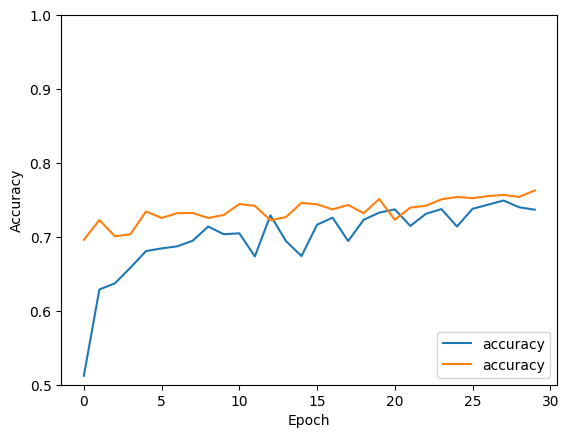

In [33]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history_test.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testSet,  testLabels, verbose=2)

example_batch = trainSet[:10]
example_result = model.predict(example_batch)
example_result




In [1]:
i = random.randint(3, 499)
img = trainSet[i]
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labelNames[np.argmax(score)], 100 * np.max(score))
)


plt.imshow(img)

NameError: name 'random' is not defined

In [55]:
pred = model.predict(testSet, batch_size=16)
pred = np.argmax(pred, axis=-1)
print(pred)

labels = np.argmax(testLabels,axis=-1)
print(labels)
conf_matrix = tf.math.confusion_matrix(labels=testLabels, predictions=pred)

print(conf_matrix)

[0 0 0 ... 1 0 0]
0
tf.Tensor(
[[1069  181]
 [ 391  859]], shape=(2, 2), dtype=int32)


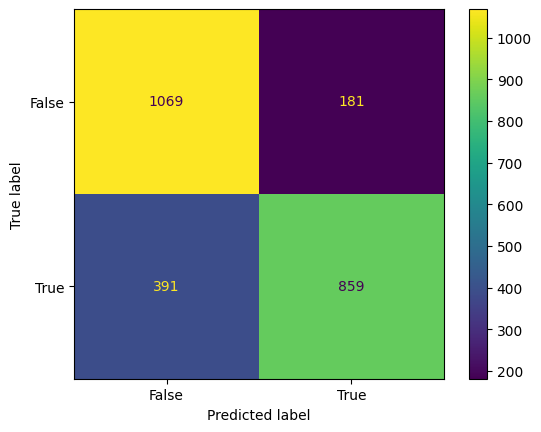

In [35]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = testLabels
confusion_matrix = metrics.confusion_matrix(actual, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()
